# Polynomial Regression

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [6]:

df_sal = pd.read_csv('Position_Salaries.csv')
df_sal.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [7]:

df_sal.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


C:\Users\esoft\AppData\Local\Temp\ipykernel_25520\573512451.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


<Axes: title={'center': 'Salary distb'}, xlabel='Salary', ylabel='Density'>

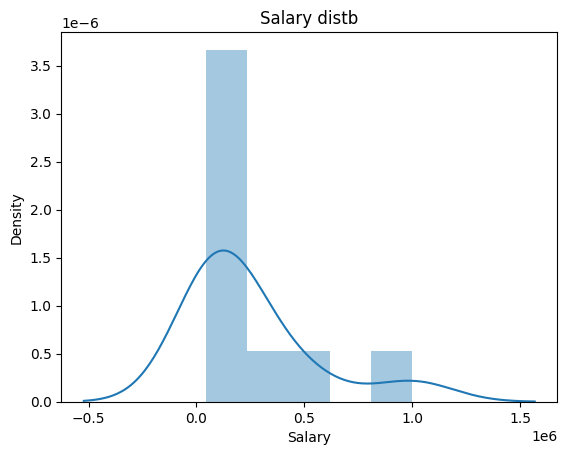

In [9]:
plt.title('Salary distb')
sns.distplot(df_sal['Salary'])

Text(0, 0.5, 'Salary')

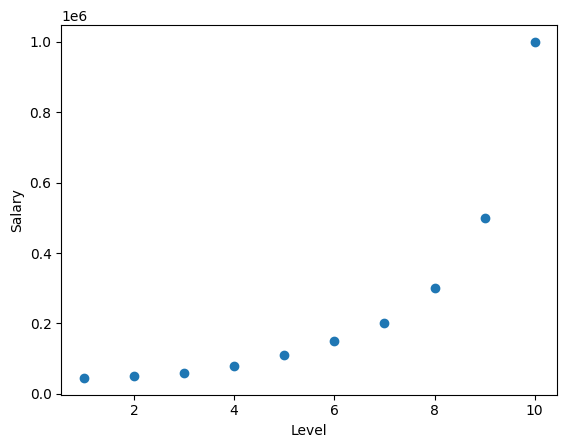

In [11]:
# relation level me salary

plt.scatter(df_sal['Level'], df_sal['Salary'])
plt.xlabel('Level')
plt.ylabel('Salary')


In [15]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [23]:
x = df_sal.iloc[:, 1:-1].values  
y = df_sal.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [24]:
# Linear Regression

reg_mod = LinearRegression()
reg_mod.fit(x, y)

LinearRegression()

In [25]:
# Polynomial Regression

pol_reg =  PolynomialFeatures(degree=4)
x_poly = pol_reg.fit_transform(x)
reg_mod_pol = LinearRegression()
reg_mod_pol.fit(x_poly, y)

LinearRegression()

In [26]:
# Linear
y_pred_reg = reg_mod.predict(x)
# plynomial
y_pred_plnm = reg_mod_pol.predict(x_poly)

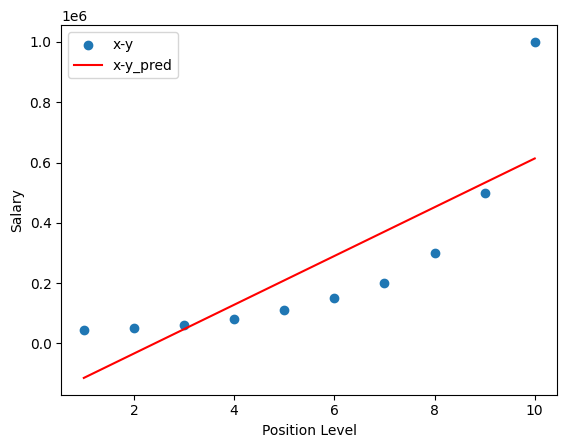

In [28]:
# visualize real=predict with linear regression
plt.scatter(x,y)
plt.plot(x, y_pred_reg, color = 'red')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['x-y', 'x-y_pred'], loc = 'best')

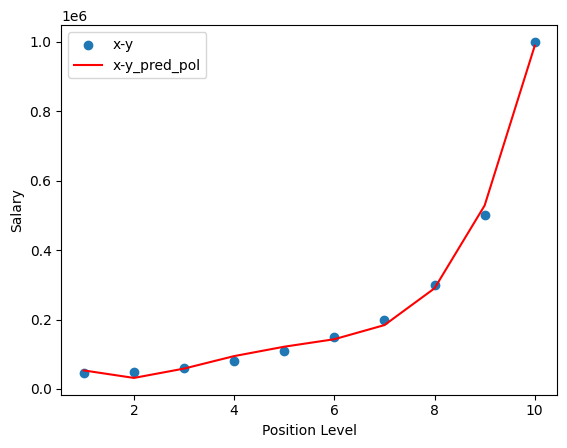

In [29]:
# visualize real=predict with polynomial linear regression
plt.scatter(x,y)
plt.plot(x, y_pred_plnm, color = 'red')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['x-y', 'x-y_pred_pol'], loc = 'best')

In [31]:
from sklearn.metrics import r2_score

print("Keoficenti i percaktueshmerise per regresioni  e thjeshte linear", r2_score(y, y_pred_reg))
print("Keoficenti i percaktueshmerise per regresioni polinomial", r2_score(y, y_pred_plnm))

Keoficenti i percaktueshmerise per regresioni  e thjeshte linear 0.6690412331929895
Keoficenti i percaktueshmerise per regresioni polinomial 0.9973922891706614
